## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.513634 -0.651211  1.091459  0.404229 -0.454585 -0.731302
1 -0.314083  1.502974  0.484325 -0.013163 -0.763968  0.418430
2  0.551584 -1.554814  0.638623  0.929199  0.843700 -0.356172
3 -1.540408 -0.295092 -1.019270 -0.214596  0.633448 -0.953928
4 -0.648258  0.491550  1.564944  0.066324  1.583031  1.335428


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0122335	total: 69.5ms	remaining: 1m 9s
1:	learn: 1.0034788	total: 70ms	remaining: 35s
2:	learn: 0.9946416	total: 70.7ms	remaining: 23.5s
3:	learn: 0.9850436	total: 71.2ms	remaining: 17.7s
4:	learn: 0.9751737	total: 71.7ms	remaining: 14.3s
5:	learn: 0.9670165	total: 72.3ms	remaining: 12s
6:	learn: 0.9567211	total: 72.9ms	remaining: 10.3s
7:	learn: 0.9466822	total: 73.3ms	remaining: 9.09s
8:	learn: 0.9391040	total: 73.8ms	remaining: 8.12s
9:	learn: 0.9320001	total: 74.3ms	remaining: 7.35s
10:	learn: 0.9236777	total: 74.8ms	remaining: 6.72s
11:	learn: 0.9151683	total: 75.3ms	remaining: 6.2s
12:	learn: 0.9065594	total: 75.9ms	remaining: 5.76s
13:	learn: 0.8972011	total: 76.4ms	remaining: 5.38s
14:	learn: 0.8888236	total: 76.8ms	remaining: 5.04s
15:	learn: 0.8802603	total: 77.3ms	remaining: 4.75s
16:	learn: 0.8723542	total: 77.8ms	remaining: 4.5s
17:	learn: 0.8646932	total: 78.3ms	remaining: 4.27s
18:	learn: 0.8577518	total: 78.7ms	remaining: 4.07s


85:	learn: 0.5015075	total: 109ms	remaining: 1.15s
86:	learn: 0.4972127	total: 109ms	remaining: 1.15s
87:	learn: 0.4925113	total: 110ms	remaining: 1.14s
88:	learn: 0.4883819	total: 110ms	remaining: 1.13s
89:	learn: 0.4853706	total: 110ms	remaining: 1.12s
90:	learn: 0.4817514	total: 111ms	remaining: 1.11s
91:	learn: 0.4783228	total: 111ms	remaining: 1.1s
92:	learn: 0.4747877	total: 112ms	remaining: 1.09s
93:	learn: 0.4712336	total: 112ms	remaining: 1.08s
94:	learn: 0.4676456	total: 113ms	remaining: 1.07s
95:	learn: 0.4638561	total: 113ms	remaining: 1.06s
96:	learn: 0.4605636	total: 113ms	remaining: 1.06s
97:	learn: 0.4572494	total: 114ms	remaining: 1.05s
98:	learn: 0.4541165	total: 114ms	remaining: 1.04s
99:	learn: 0.4496728	total: 115ms	remaining: 1.03s
100:	learn: 0.4466462	total: 115ms	remaining: 1.02s
101:	learn: 0.4428620	total: 115ms	remaining: 1.02s
102:	learn: 0.4392057	total: 116ms	remaining: 1.01s
103:	learn: 0.4356834	total: 116ms	remaining: 1s
104:	learn: 0.4326938	total: 11

253:	learn: 0.1547966	total: 187ms	remaining: 550ms
254:	learn: 0.1535040	total: 188ms	remaining: 549ms
255:	learn: 0.1526755	total: 188ms	remaining: 547ms
256:	learn: 0.1515829	total: 189ms	remaining: 546ms
257:	learn: 0.1506952	total: 189ms	remaining: 545ms
258:	learn: 0.1498777	total: 190ms	remaining: 543ms
259:	learn: 0.1488643	total: 190ms	remaining: 541ms
260:	learn: 0.1477666	total: 191ms	remaining: 540ms
261:	learn: 0.1466599	total: 191ms	remaining: 538ms
262:	learn: 0.1456202	total: 192ms	remaining: 537ms
263:	learn: 0.1446939	total: 192ms	remaining: 535ms
264:	learn: 0.1434917	total: 192ms	remaining: 533ms
265:	learn: 0.1425374	total: 193ms	remaining: 532ms
266:	learn: 0.1415895	total: 193ms	remaining: 531ms
267:	learn: 0.1405039	total: 194ms	remaining: 529ms
268:	learn: 0.1397717	total: 194ms	remaining: 528ms
269:	learn: 0.1387617	total: 195ms	remaining: 527ms
270:	learn: 0.1378181	total: 195ms	remaining: 525ms
271:	learn: 0.1369508	total: 196ms	remaining: 524ms
272:	learn: 

481:	learn: 0.0473289	total: 291ms	remaining: 313ms
482:	learn: 0.0470004	total: 292ms	remaining: 313ms
483:	learn: 0.0466690	total: 293ms	remaining: 312ms
484:	learn: 0.0463231	total: 293ms	remaining: 311ms
485:	learn: 0.0460489	total: 294ms	remaining: 311ms
486:	learn: 0.0457641	total: 294ms	remaining: 310ms
487:	learn: 0.0454958	total: 295ms	remaining: 309ms
488:	learn: 0.0453986	total: 295ms	remaining: 308ms
489:	learn: 0.0450908	total: 295ms	remaining: 307ms
490:	learn: 0.0447891	total: 296ms	remaining: 307ms
491:	learn: 0.0444909	total: 296ms	remaining: 306ms
492:	learn: 0.0443403	total: 297ms	remaining: 305ms
493:	learn: 0.0440473	total: 297ms	remaining: 304ms
494:	learn: 0.0437167	total: 298ms	remaining: 304ms
495:	learn: 0.0435718	total: 298ms	remaining: 303ms
496:	learn: 0.0432858	total: 299ms	remaining: 302ms
497:	learn: 0.0431446	total: 299ms	remaining: 302ms
498:	learn: 0.0428637	total: 300ms	remaining: 301ms
499:	learn: 0.0425878	total: 300ms	remaining: 300ms
500:	learn: 

653:	learn: 0.0206652	total: 370ms	remaining: 196ms
654:	learn: 0.0206224	total: 370ms	remaining: 195ms
655:	learn: 0.0205417	total: 371ms	remaining: 195ms
656:	learn: 0.0204263	total: 371ms	remaining: 194ms
657:	learn: 0.0203600	total: 372ms	remaining: 193ms
658:	learn: 0.0203187	total: 372ms	remaining: 193ms
659:	learn: 0.0202807	total: 373ms	remaining: 192ms
660:	learn: 0.0202134	total: 373ms	remaining: 191ms
661:	learn: 0.0201487	total: 373ms	remaining: 191ms
662:	learn: 0.0201085	total: 374ms	remaining: 190ms
663:	learn: 0.0200273	total: 374ms	remaining: 189ms
664:	learn: 0.0199484	total: 375ms	remaining: 189ms
665:	learn: 0.0198607	total: 375ms	remaining: 188ms
666:	learn: 0.0197738	total: 376ms	remaining: 188ms
667:	learn: 0.0196643	total: 376ms	remaining: 187ms
668:	learn: 0.0196039	total: 377ms	remaining: 186ms
669:	learn: 0.0195465	total: 377ms	remaining: 186ms
670:	learn: 0.0194903	total: 377ms	remaining: 185ms
671:	learn: 0.0194393	total: 378ms	remaining: 184ms
672:	learn: 

880:	learn: 0.0103582	total: 476ms	remaining: 64.2ms
881:	learn: 0.0103439	total: 476ms	remaining: 63.7ms
882:	learn: 0.0102880	total: 477ms	remaining: 63.2ms
883:	learn: 0.0102371	total: 477ms	remaining: 62.6ms
884:	learn: 0.0102192	total: 477ms	remaining: 62ms
885:	learn: 0.0102053	total: 478ms	remaining: 61.5ms
886:	learn: 0.0101554	total: 478ms	remaining: 60.9ms
887:	learn: 0.0101326	total: 479ms	remaining: 60.4ms
888:	learn: 0.0100918	total: 479ms	remaining: 59.8ms
889:	learn: 0.0100791	total: 480ms	remaining: 59.3ms
890:	learn: 0.0100275	total: 480ms	remaining: 58.7ms
891:	learn: 0.0100141	total: 480ms	remaining: 58.2ms
892:	learn: 0.0100057	total: 481ms	remaining: 57.6ms
893:	learn: 0.0099926	total: 481ms	remaining: 57ms
894:	learn: 0.0099421	total: 482ms	remaining: 56.5ms
895:	learn: 0.0099292	total: 482ms	remaining: 55.9ms
896:	learn: 0.0099210	total: 482ms	remaining: 55.4ms
897:	learn: 0.0098676	total: 483ms	remaining: 54.9ms
898:	learn: 0.0098207	total: 483ms	remaining: 54.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

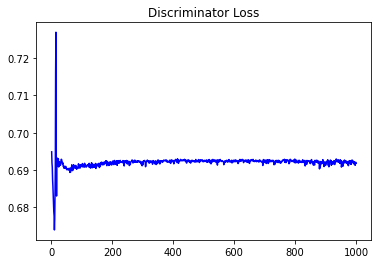

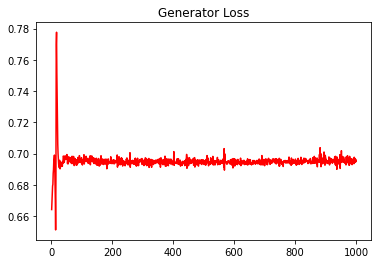

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07380291297550834


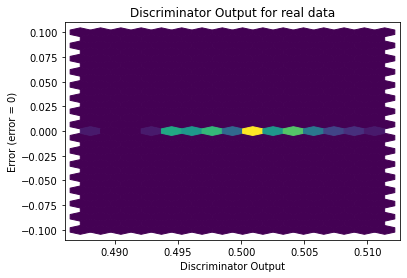

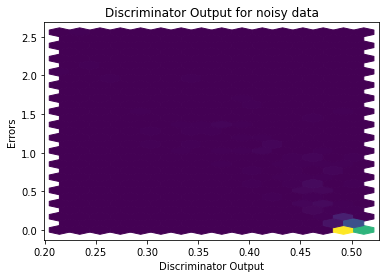

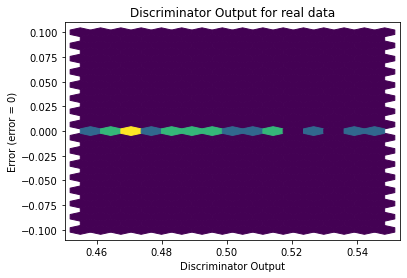

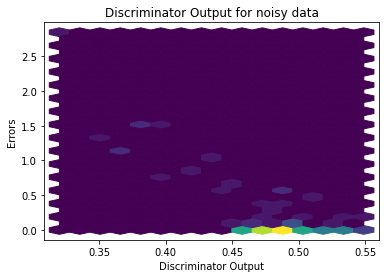

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


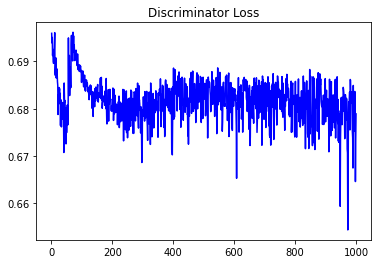

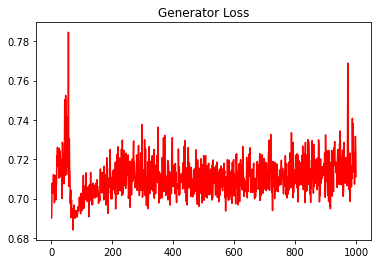

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.05149095151380434


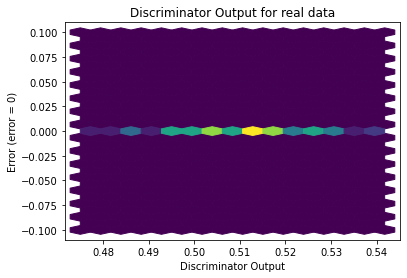

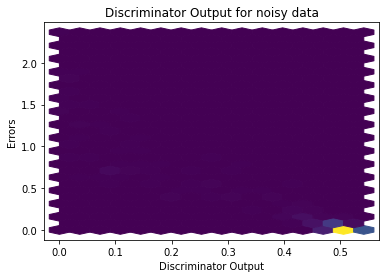

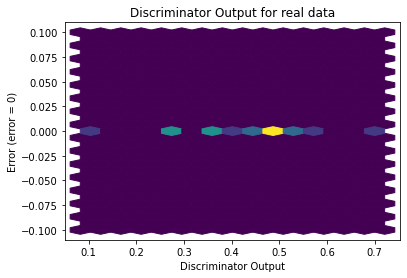

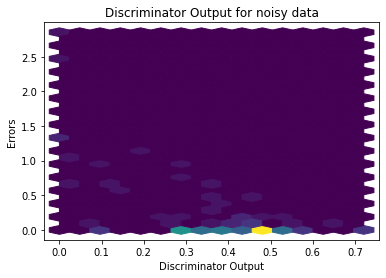

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2316]], requires_grad=True)
